In [1]:
import pandas as pd
data=pd.read_csv('data_scientist_united_states_job_postings_jobspikr.csv')
data.head()

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   crawl_timestamp       10000 non-null  object 
 1   url                   10000 non-null  object 
 2   job_title             10000 non-null  object 
 3   category              9118 non-null   object 
 4   company_name          9999 non-null   object 
 5   city                  9751 non-null   object 
 6   state                 9584 non-null   object 
 7   country               10000 non-null  object 
 8   inferred_city         8980 non-null   object 
 9   inferred_state        9484 non-null   object 
 10  inferred_country      9505 non-null   object 
 11  post_date             10000 non-null  object 
 12  job_description       10000 non-null  object 
 13  job_type              10000 non-null  object 
 14  salary_offered        597 non-null    object 
 15  job_board           

In [3]:
columns_to_drop = ["contact_email", "contact_phone_number","html_job_description","cursor","uniq_id","inferred_state","inferred_city","inferred_country","salary_offered"]
data = data.drop(columns=columns_to_drop)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   crawl_timestamp  10000 non-null  object
 1   url              10000 non-null  object
 2   job_title        10000 non-null  object
 3   category         9118 non-null   object
 4   company_name     9999 non-null   object
 5   city             9751 non-null   object
 6   state            9584 non-null   object
 7   country          10000 non-null  object
 8   post_date        10000 non-null  object
 9   job_description  10000 non-null  object
 10  job_type         10000 non-null  object
 11  job_board        9310 non-null   object
 12  geo              9300 non-null   object
dtypes: object(13)
memory usage: 1015.8+ KB


In [4]:
data['crawl_date'] = data['crawl_timestamp'].str.split().str[0]
data['crawl_date'] = pd.to_datetime(data['crawl_date'])
data['post_date'] = pd.to_datetime(data['post_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   crawl_timestamp  10000 non-null  object        
 1   url              10000 non-null  object        
 2   job_title        10000 non-null  object        
 3   category         9118 non-null   object        
 4   company_name     9999 non-null   object        
 5   city             9751 non-null   object        
 6   state            9584 non-null   object        
 7   country          10000 non-null  object        
 8   post_date        10000 non-null  datetime64[ns]
 9   job_description  10000 non-null  object        
 10  job_type         10000 non-null  object        
 11  job_board        9310 non-null   object        
 12  geo              9300 non-null   object        
 13  crawl_date       10000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(12)
memory

In [5]:
data.drop(columns=['crawl_timestamp'], inplace=True)

In [6]:
data

,url,job_title,category,company_name,city,state,country,post_date,job_description,job_type,job_board,geo,crawl_date
0,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,2019-02-06,Read what people are saying about working here...,Undefined,indeed,usa,2019-02-06
1,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,dice,usa,2019-02-06
2,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,2019-02-05,Candidates should have the following backgroun...,Full Time,dice,usa,2019-02-06
3,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,2019-02-06,Read what people are saying about working here...,Undefined,indeed,usa,2019-02-06
4,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,monster,usa,2019-02-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,2019-09-27,Join Upstart and help build the future of cred...,Full Time,Stackoverflow,NaN,2019-09-29
9996,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,2019-09-11,"Data Scientist, (Staff or Principal) at realto...",Full Time,Stackoverflow,NaN,2019-10-01
9997,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,2019-09-03,Job Summary: Would you like to play a part in ...,Full Time,Stackoverflow,NaN,2019-09-26
9998,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,2019-09-11,"Data Scientist, (Staff or Principal) at realto...",Full Time,Stackoverflow,NaN,2019-09-27


In [7]:
data=data.drop_duplicates()

In [8]:
data['country'].unique()

array(['Usa', 'US', 'United States'], dtype=object)

Since Usa,US and United States are same lets convert to single values

In [9]:
data['country'] = 'United States'

C:\Users\harsh\AppData\Local\Temp\ipykernel_2660\3659780646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country'] = 'United States'


In [10]:
data.head(3)

,url,job_title,category,company_name,city,state,country,post_date,job_description,job_type,job_board,geo,crawl_date
0,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,United States,2019-02-06,Read what people are saying about working here...,Undefined,indeed,usa,2019-02-06
1,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,United States,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,dice,usa,2019-02-06
2,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,United States,2019-02-05,Candidates should have the following backgroun...,Full Time,dice,usa,2019-02-06


In [11]:
data['category'].fillna('Undefined', inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_2660\964776542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'].fillna('Undefined', inplace=True)


In [12]:
data['job_board'].fillna('Undefined', inplace=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_2660\2575215569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['job_board'].fillna('Undefined', inplace=True)


In [13]:
data['post-crawl_duration']=data['crawl_date']-data['post_date']
data.head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_2660\2614410048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['post-crawl_duration']=data['crawl_date']-data['post_date']


,url,job_title,category,company_name,city,state,country,post_date,job_description,job_type,job_board,geo,crawl_date,post-crawl_duration
0,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,United States,2019-02-06,Read what people are saying about working here...,Undefined,indeed,usa,2019-02-06,0 days
1,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,Undefined,Luxoft USA Inc,Middletown,NJ,United States,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,dice,usa,2019-02-06,1 days
2,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,Undefined,Cincinnati Bell Technology Solutions,New York,NY,United States,2019-02-05,Candidates should have the following backgroun...,Full Time,dice,usa,2019-02-06,1 days
3,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),United States,2019-02-06,Read what people are saying about working here...,Undefined,indeed,usa,2019-02-06,0 days
4,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,United States,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,monster,usa,2019-02-06,1 days


In [14]:
data.isnull().sum()

url                      0
job_title                0
category                 0
company_name             1
city                   249
state                  375
country                  0
post_date                0
job_description          0
job_type                 0
job_board                0
geo                    659
crawl_date               0
post-crawl_duration      0
dtype: int64

In [15]:
data=data.dropna(subset=['company_name'])
data=data.dropna(subset=['geo'])
data.isnull().sum()

url                      0
job_title                0
category                 0
company_name             0
city                   249
state                  340
country                  0
post_date                0
job_description          0
job_type                 0
job_board                0
geo                      0
crawl_date               0
post-crawl_duration      0
dtype: int64

In [16]:
data['city'].fillna('Undefined', inplace=True)
data['state'].fillna('Undefined', inplace=True)
data.isnull().sum()

url                    0
job_title              0
category               0
company_name           0
city                   0
state                  0
country                0
post_date              0
job_description        0
job_type               0
job_board              0
geo                    0
crawl_date             0
post-crawl_duration    0
dtype: int64

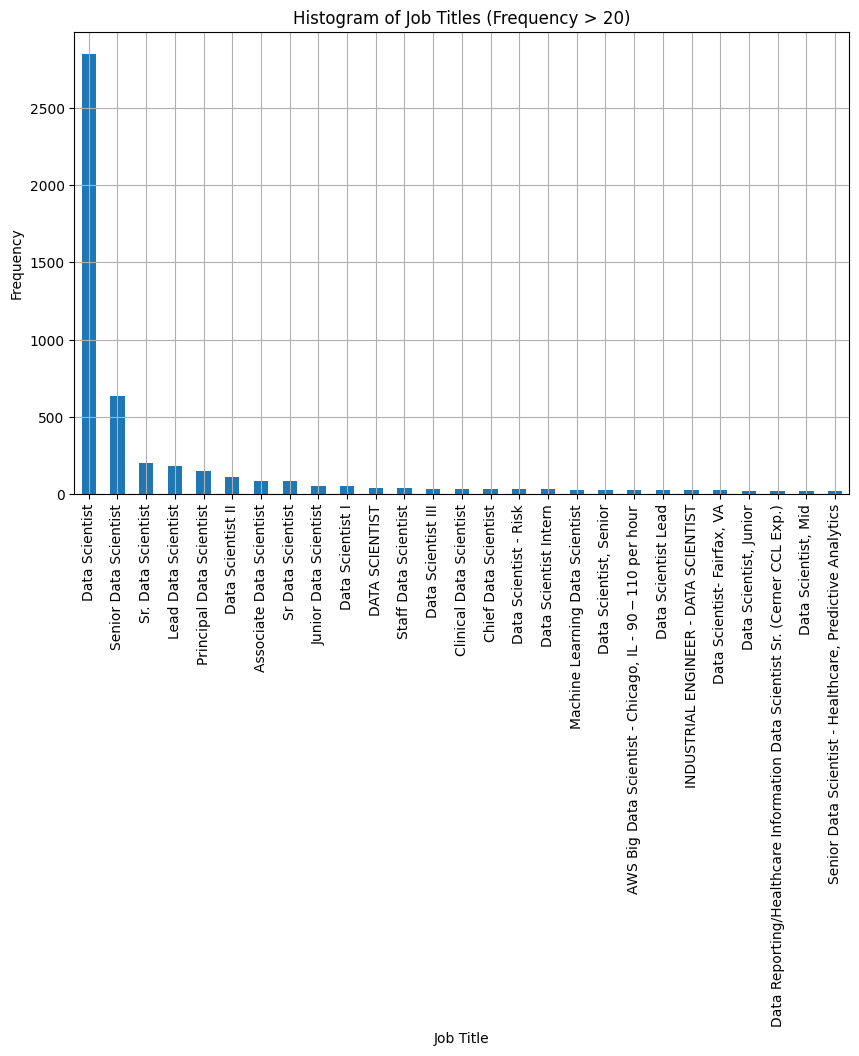

In [17]:
#data visualisation
import matplotlib.pyplot as plt
job_title_counts = data['job_title'].value_counts()

# Filter job titles with frequency greater than 20
selected_job_titles = job_title_counts[job_title_counts > 20]

# Plot the histogram
selected_job_titles.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Job Titles (Frequency > 20)')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.grid()
plt.show()



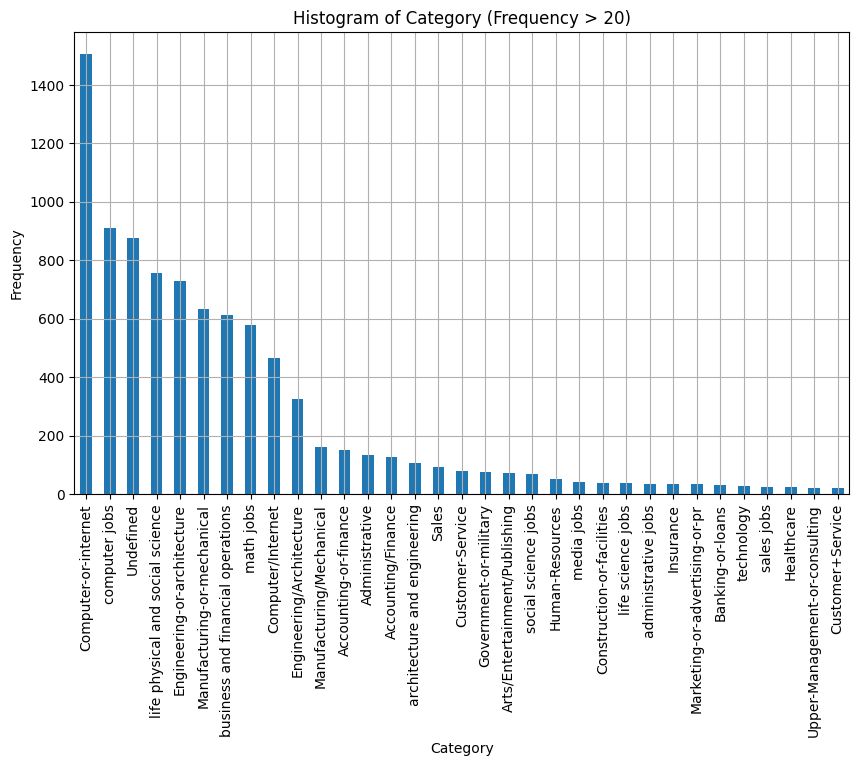

In [18]:
import matplotlib.pyplot as plt
job_category_counts = data['category'].value_counts()

# Filter job category with frequency greater than 20
selected_job_category = job_category_counts[job_category_counts > 20]

# Plot the histogram
selected_job_category.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Category (Frequency > 20)')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.grid()
plt.show()

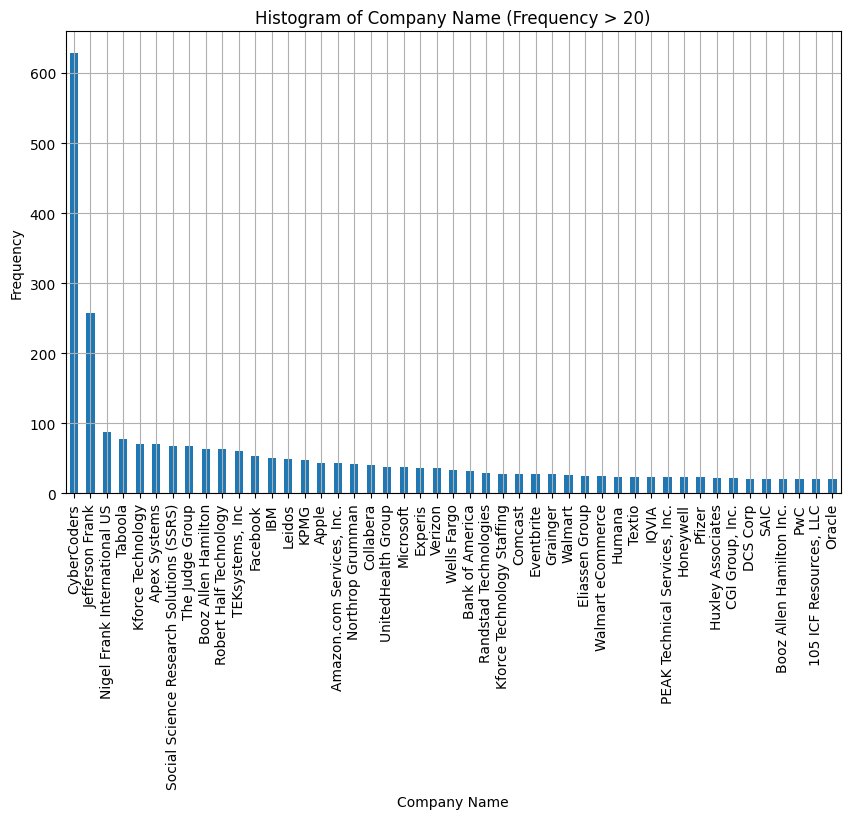

In [19]:
#data visualisation
import matplotlib.pyplot as plt
company_name_counts = data['company_name'].value_counts()

# Filter company name with frequency greater than 20
selected_company_name = company_name_counts[company_name_counts > 20]

# Plot the histogram
selected_company_name.plot(kind='bar', figsize=(10, 6))
plt.title('Histogram of Company Name (Frequency > 20)')
plt.xlabel('Company Name')
plt.ylabel('Frequency')
plt.grid()
plt.show()

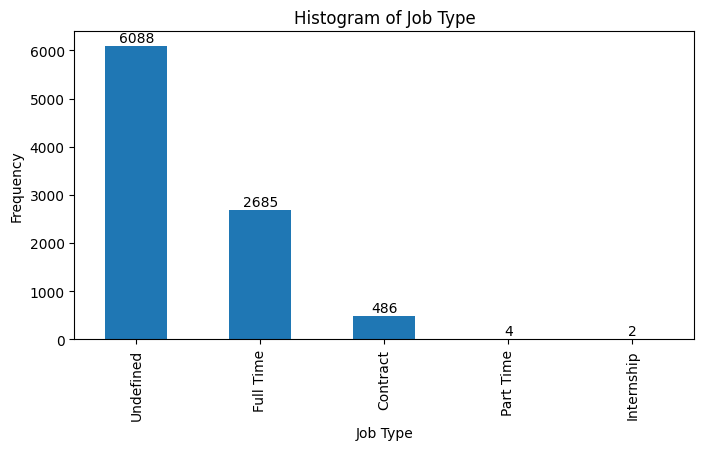

In [20]:
#data visualisation
import matplotlib.pyplot as plt
job_type_counts = data['job_type'].value_counts()

# Plot the histogram
ax=job_type_counts.plot(kind='bar', figsize=(8, 4))
plt.title('Histogram of Job Type')
plt.xlabel('Job Type')
plt.ylabel('Frequency')
# Add labels at the top of the bars
for i, v in enumerate(job_type_counts):
    ax.text(i, v + 20, str(v), ha='center', va='bottom')
plt.show()

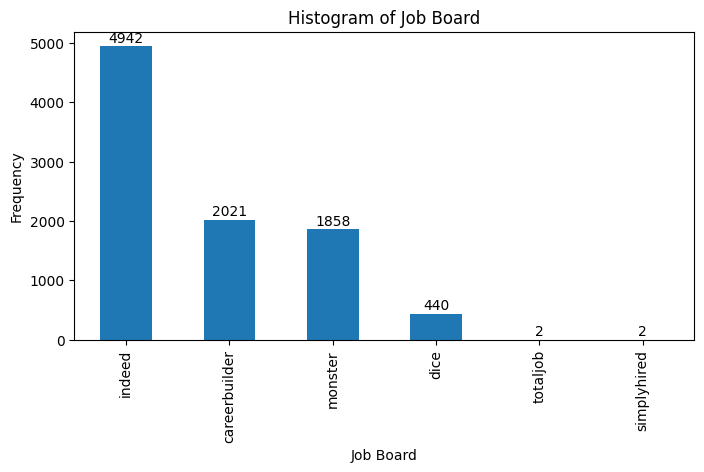

In [21]:
#data visualisation
import matplotlib.pyplot as plt
job_board_counts = data['job_board'].value_counts()

# Plot the histogram
ax=job_board_counts.plot(kind='bar', figsize=(8, 4))
plt.title('Histogram of Job Board')
plt.xlabel('Job Board')
plt.ylabel('Frequency')
# Add labels at the top of the bars
for i, v in enumerate(job_board_counts):
    ax.text(i, v + 20, str(v), ha='center', va='bottom')
plt.show()

In [22]:
data.to_excel('output1.xlsx', index=False)